## Randomized singular value decomposition 

                

In [20]:
import fonctions.rsvd as rd

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
import scipy as sp 

## Artificiel matrix 

simulation of matrix with slow and rapid decayin spectrum. 

In [22]:
#write a matrix that have rapid decaying singular value 
def decaying_rapidly(m,n, q):
    U =rd.ortho( np.random.normal(0,1, (m,n)))
    V = rd.ortho( np.random.normal(0,1, (m,n)))
    S = [q** i for i in range(n)]
    return U @np.diag(S)@V.T

In [23]:
#creation of artificiel matrix 
def slow_matrix(m,n, q,a=0.3):
    U =rd.ortho( np.random.normal(0,1, (m,n)))
    V = rd.ortho( np.random.normal(0,1, (m,n)))
    S = [a+i*q if i<n//2 else 0.7 for i in range(1,n+1)]
    return U@np.diag(S)@V.T

## Application

### Application on matrix with a singular values spectrum that decays rapidly. 

In [46]:
#we set a matrix A 
m,n = 600, 600
A = decaying_rapidly(m,n,0.6)
#and form its svd 
_, As, _= np.linalg.svd(A)

1. Visualisation of the spectrum 

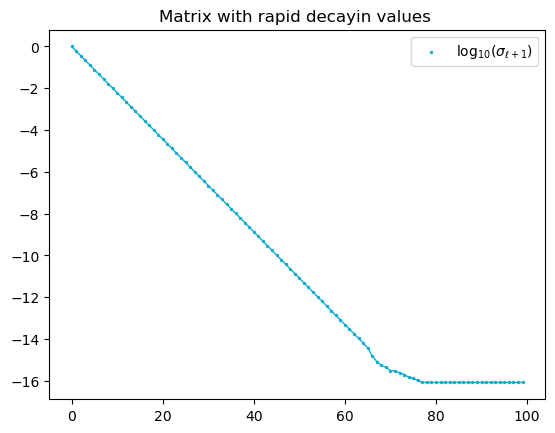

In [47]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(100), np.log10(As[:100]), color = '#11accd', s=2, label = r'$\log_{10}(\sigma_{\ell+1})$',
           marker = 'o')
ax.plot(range(100), np.log10(As[:100]), color='#11accd', linewidth=1)
ax.set_title('Matrix with rapid decayin values ')
plt.legend()
#plt.yscale('log')

3. We compute the rsvd with the combination of algorithm 2 for the range finder Q and test for several ranks:

In [50]:
#Computing the rsvd on A 
l = range(1, 100, 5)# rank
min_ = list()
errors = list()

for k in l:
    Q = rd.range_finder(A, k)
    err = np.linalg.norm((np.eye(m)- Q @ np.transpose(Q))@ A) # frobinus norm  
    errors.append(np.log10(err))
    min_.append(np.log10(As[k+1]))

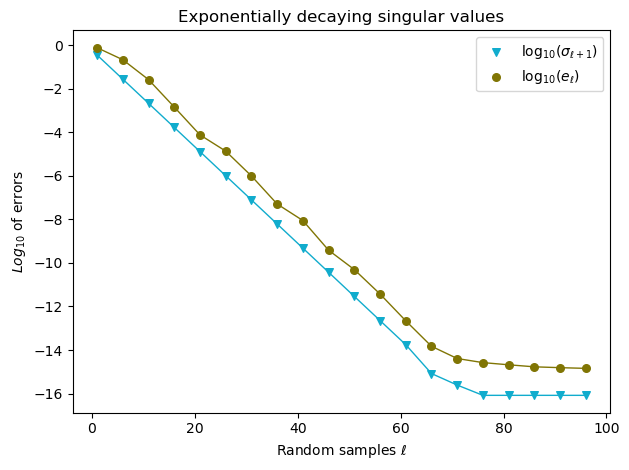

In [51]:
#generating figures:
fig, ax = plt.subplots(1, 1)
ax.scatter(l, min_, color='#11accd', s=30,
               label=r'$\log_{10}(\sigma_{\ell+1})$', marker='v')
ax.scatter(l, errors, color='#807504', s=30, label=r'$\log_{10}(e_{\ell})$',
               marker='o')
ax.plot(l, min_, color='#11accd', linewidth=1)
ax.plot(l, errors, color='#807504', linewidth=1)

ax.set_ylabel(r'$Log_{10}$ of errors ')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title('Exponentially decaying singular values')

plt.legend()
plt.tight_layout()
plt.show()

This is the demonstration that for a matrix with rapidly decaying singular values, the approximation is close to the theorical error but does not go lower than the minimum. 

## Singular values that decay slowly  

### The prototype algorithm
First we try we the basic scheme of the rsvd, (ie) combination of algorithm 1 and 2 

1. Setting a matrix whith a slow decaying singular values spectrum. 

In [28]:
m,n = 200, 200
B = slow_matrix(m,n, 0.2,a=0.3 ) 
_, Bs, _= np.linalg.svd(B)

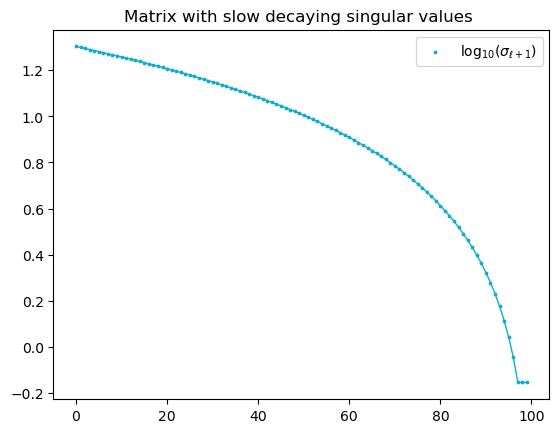

In [29]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(100), np.log10(Bs[:100]), color = '#11accd', s=3, 
           label = r'$\log_{10}(\sigma_{\ell+1})$', marker = 'o')
ax.plot(range(100), np.log10(Bs[:100]), color='#11accd', linewidth=1)
ax.set_title('Matrix with slow decaying singular values ')
plt.legend()

In [30]:
#Computing the rsvd on A 
l = range(1, 100, 5)# rank
min_ = list()
errors = list()

for k in l:
    Q = rd.range_finder(B, k)
    err = np.linalg.norm((np.eye(m)- Q @ np.transpose(Q))@ B) #norm de frobinus 
    errors.append(np.log10(err))
    min_.append(np.log10(Bs[k+1]))

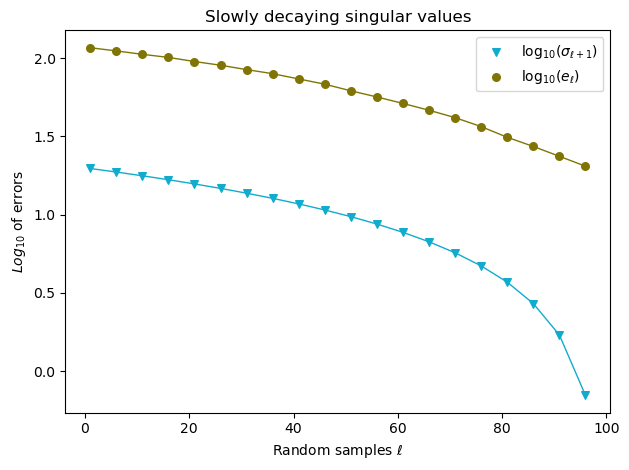

In [31]:
fig, ax = plt.subplots(1, 1)
ax.scatter(l, min_, color='#11accd', s=30,
               label=r'$\log_{10}(\sigma_{\ell+1})$', marker='v')
ax.scatter(l, errors, color='#807504', s=30, label=r'$\log_{10}(e_{\ell})$',
               marker='o')
ax.plot(l, min_, color='#11accd', linewidth=1)
ax.plot(l, errors, color='#807504', linewidth=1)

ax.set_ylabel(r'$Log_{10}$ of errors ')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title('Slowly decaying singular values')

plt.legend()
plt.tight_layout()
plt.show()

The diffrence between the approximation and the theorical mnimum is grater that the one for the matrix A. We should use another algorithm for range finder. 

### Visualisation of the power iteration with the svd 

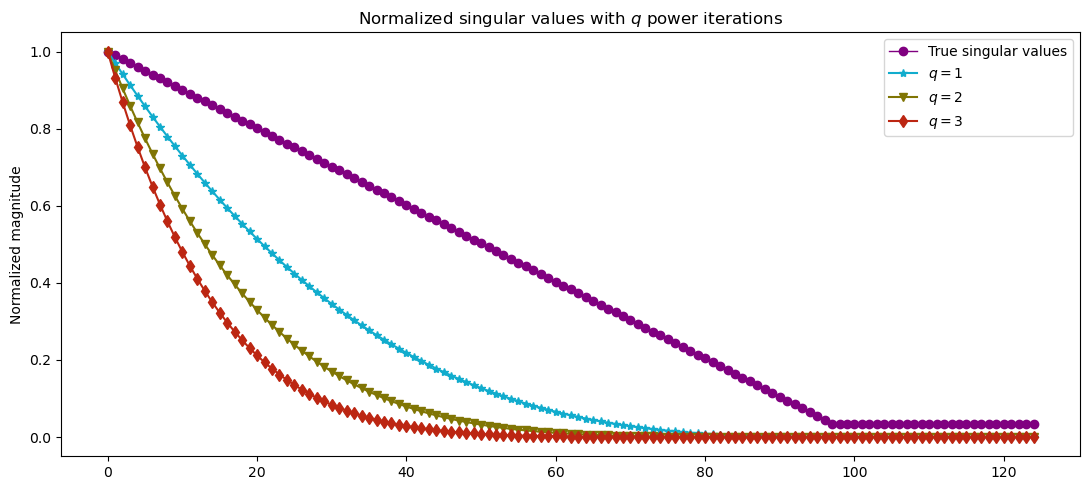

In [56]:
#First we normalise the singular values of B:
S_true = [s / Bs.max() for s in Bs]
x = range(len(S_true)) #counting each singular values 

#settinfg the plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11, 5)
ax.scatter(x[:125], S_true[:125], color='purple', s=1)
ax.plot(x[:125], S_true[:125], label='True singular values', color='purple', marker='o', linewidth=1)

#Computing the Power-Iteration range finder algorithm with different values of power q:
qs = [(1, '#11accd', '*'), (2, '#807504', 'v'), (3, '#bc2612', 'd')]
for q, color, marker in qs:
    B_new = rd.power_it(B,q)
    S = np.linalg.svd(B_new, compute_uv=False)
    S_new = [s / S.max() for s in S]
    ax.scatter(x[:125], S_new[:125], color=color, s=1)
    ax.plot(x[:125], S_new[:125], label=r'$q = %s$' % q, color=color, marker=marker)
ax.set_title('Normalized singular values with $q$ power iterations')
ax.set_ylabel('Normalized magnitude')
plt.legend()
plt.tight_layout()
plt.show()

### Computing the rsvd with power iteration 

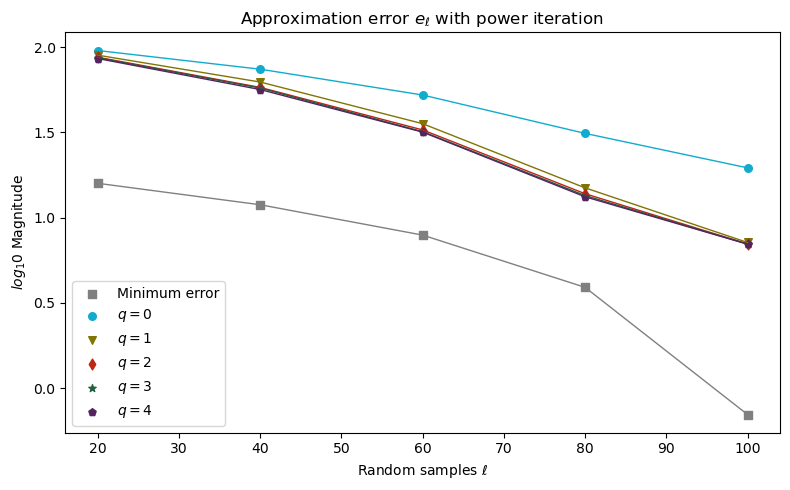

In [33]:
mins = list()
q2list = {
    0: ([], '#11accd', 'o'),
    1: ([], '#807504', 'v'),
    2: ([], '#bc2612', 'd'),
    3: ([], '#236040', '*'), 
    4: ([],'#552360', 'p' )
    }

l = [20, 40, 60, 80, 100]
qs = [0, 1, 2, 3, 4]


#Computing the rsvd with power iteration on B
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=Bs[k+1]
    mins.append(np.log10(a))
    #approximation for each q 
    for q in qs: 
        Q = rd.range_finder(B, k, q) #range finder with power iteration scheme 
        err = np.linalg.norm((np.eye(m)- Q @ np.transpose(Q))@ B) # approximation error  
        q2list[q][0].append(np.log10(err))
        
#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)

#plot for approximation 
for q in qs:
    data, color, marker = q2list[q]
    ax.scatter(l, data, s=30, label=r'$q = %s$' % q, marker=marker,
                   color=color)
    ax.plot(l, data, linewidth=1, color=color)

ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with power iteration ')
plt.legend()
plt.tight_layout()
plt.show()




        

We see that the last iteration $q=2, 3, 4$ are very close, we cannot go closer than those approximations.  
For q=2, we have a better approximation, it reduce the error. 

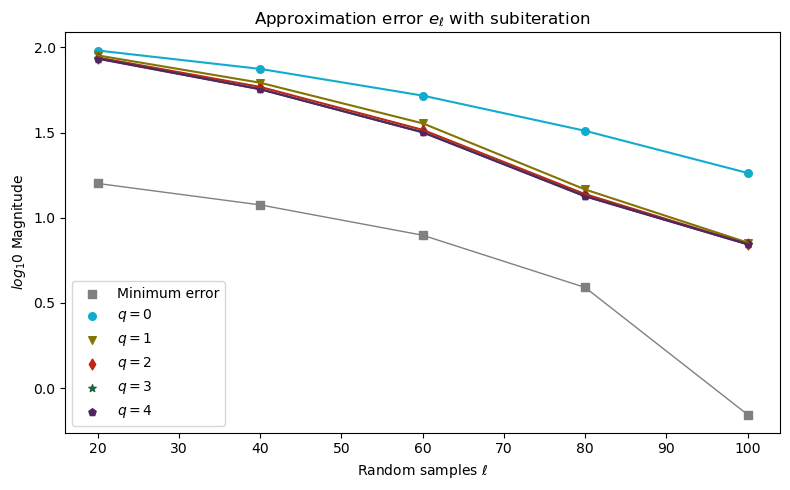

In [34]:
m,n = 200, 200
B = slow_matrix(m,n, 0.2,a=0.3 ) 
_, Bs, _= np.linalg.svd(B)


mins = list()

# different exponent q 
q2list = {
    0: ([], '#11accd', 'o'),
    1: ([], '#807504', 'v'),
    2: ([], '#bc2612', 'd'),
    3: ([], '#236040', '*'), 
    4: ([],'#552360', 'p' )
    }
#ranks 
l = [20, 40 ,60, 80, 100]
qs= [0,1,2,3,4]
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,5)

#theorical minimum 
 
for k in l:
    mins.append(np.log10(Bs[k+1]))
    for q in qs:
        Q = rd.sub_iter(B, k, q)
        e = np.linalg.norm(((np.eye(m)- Q @ np.transpose(Q)) @ B), 'fro')
        q2list[q][0].append(np.log10(e))

#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)

for q in qs:
    error, color, mark = q2list[q]
    ax.scatter(l, error, s=30, label=r'$q = %s$' % q, marker=mark,
                   color=color)
    ax.plot(l, error, color=color)

ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with subiteration ')
plt.legend()
plt.tight_layout()
plt.show()


### Computing the rsvd with subspace iteration. 

In this example we choose to apply the subspace iteration algorithm to a racoon image in gray.  

In [35]:
from scipy.misc import face 

In [73]:
C=face(gray=True) #generate the image of the racoon (dense matrix)
C = C.astype(float)
_,Cs,_ = np.linalg.svd(C.T)
m,n=np.shape(C)
m,n

(768, 1024)

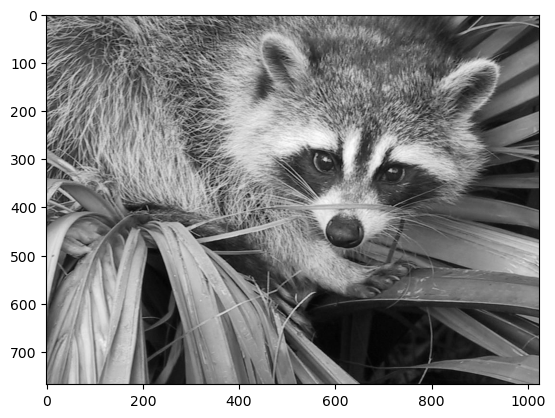

In [37]:
#The image 
plt.imshow(C, cmap='gray')

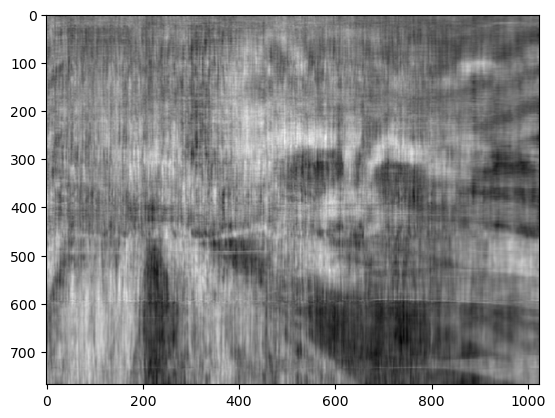

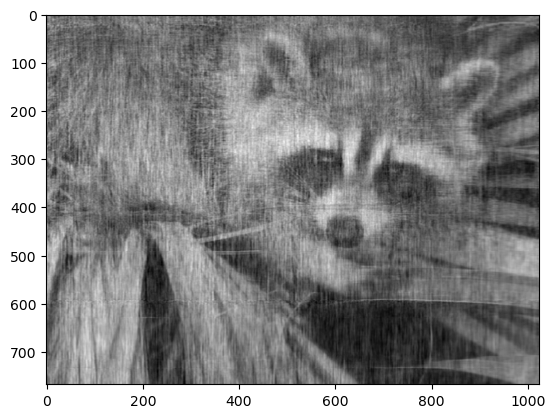

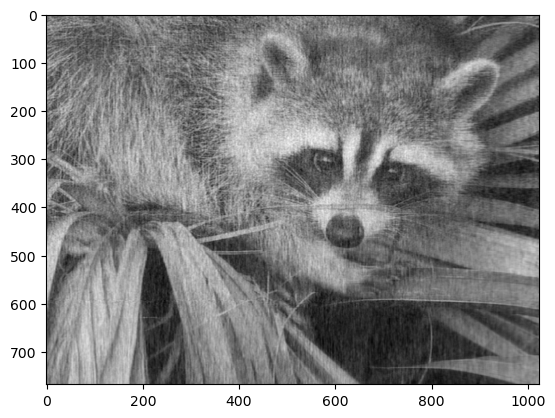

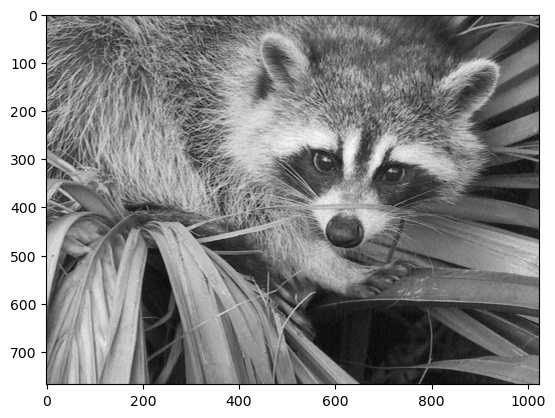

In [71]:
#rsvd on the second dimension n=1024
rank = [20,50, 100, 300]
for elt in rank:
    U,S,Vt = rd.rsvd(C.T, elt)
    Cr = (U*S)@Vt
    plt.imshow(Cr.T, cmap='gray')
    plt.show()

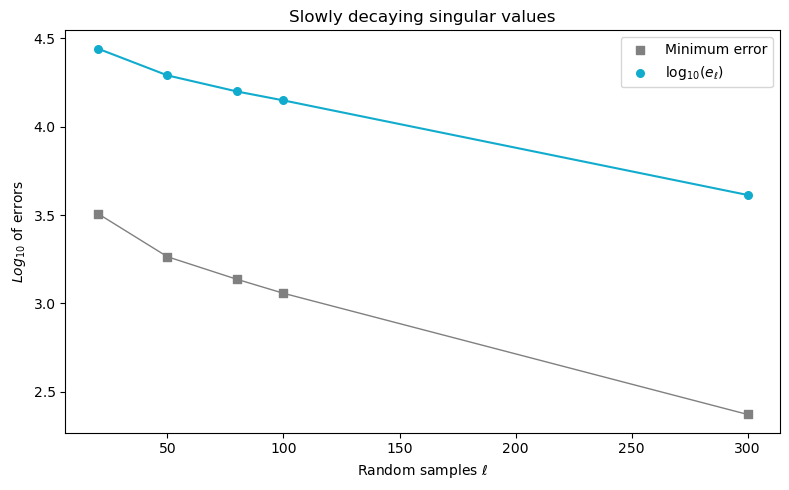

In [39]:
mins= []
err = []

l = [20, 50, 80, 100, 300]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=Cs[k+1]
    mins.append(np.log10(a))
    Q = rd.range_finder(C.T, k)
    e = np.linalg.norm((np.eye(n)- Q@ Q.T)@ C.T)
    err.append(np.log10(e))

ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)
ax.scatter(l, err, color= '#11accd', s=30, label= r'$\log_{10}(e_{\ell})$')
ax.plot(l, err, color= '#11accd')
ax.set_ylabel(r'$Log_{10}$ of errors ')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title('Slowly decaying singular values')

plt.legend()
plt.tight_layout()
plt.show()

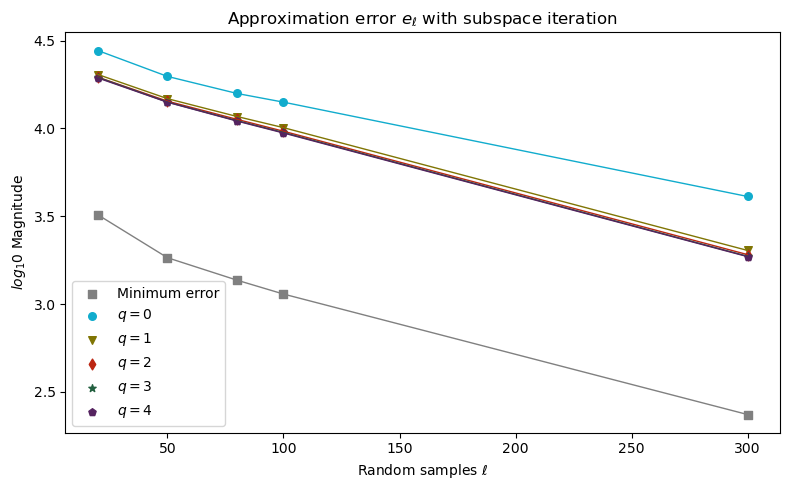

In [40]:
mins = list()
q2list = {
    0: ([], '#11accd', 'o'),
    1: ([], '#807504', 'v'),
    2: ([], '#bc2612', 'd'),
    3: ([], '#236040', '*'), 
    4: ([],'#552360', 'p' )
    }

l = [20, 50, 80, 100, 300]
qs = [0, 1, 2, 3, 4]


#Computing the rsvd with power iteration on B
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=Cs[k+1]
    mins.append(np.log10(a))
    #approximation for each q 
    for q in qs: 
        Q = rd.sub_iter(C, k, q)
        err = np.linalg.norm((np.eye(m)- Q @ np.transpose(Q))@ C) #norm de frobinus 
        q2list[q][0].append(np.log10(err))
#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)
#plot for approximation 
for q in qs:
    data, color, marker = q2list[q]
    ax.scatter(l, data, s=30, label=r'$q = %s$' % q, marker=marker,
                   color=color)
    ax.plot(l, data, linewidth=1, color=color)

ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with subspace iteration ')
plt.legend()
plt.tight_layout()
plt.show()

### Computing the rsvd with subspace iteration and row extraction 

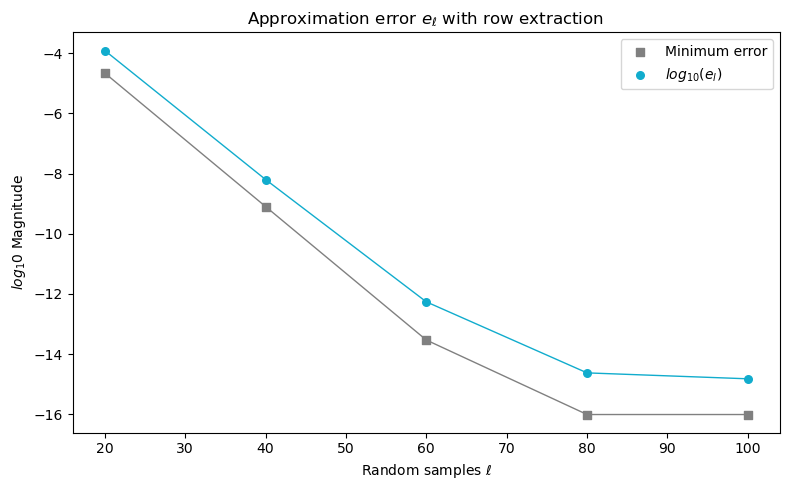

In [41]:
mins = list()
m,n = A.shape
err = list()
l = [20, 40, 60, 80, 100]
#Computing the rsvd with power iteration on B
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=As[k+1]
    mins.append(np.log10(a))
    _,_,_, Q = rd.rsvd(A, k,e=0.1, return_range=True )
    e = np.linalg.norm((np.eye(m)- Q @ Q.T)@ A) #norm de frobinus
    err.append(np.log10(e))

#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)
#plot for row extraction 
ax.scatter(l, err, color='#11accd', s=30, label=r'$log_{10}(e_l)$', marker='o')
ax.plot(l, err, color='#11accd', linewidth=1)
ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with row extraction ')
plt.legend()
plt.tight_layout()
plt.show()

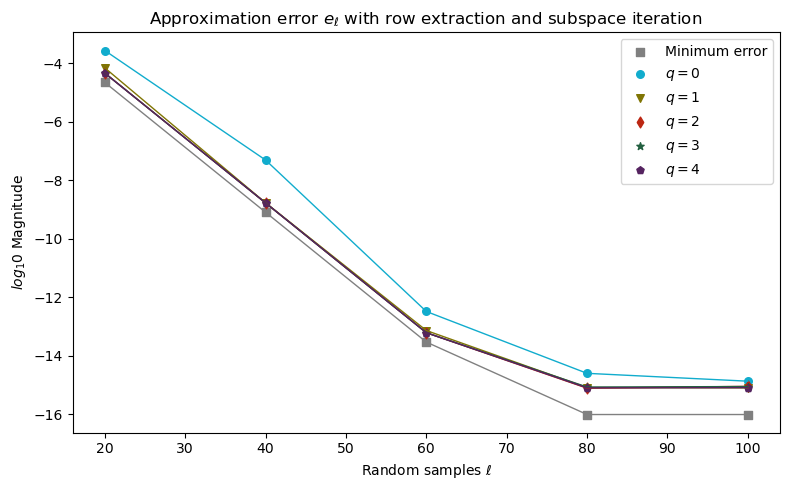

In [42]:
mins = list()
m,n = A.shape
q2list = {
    0: ([], '#11accd', 'o'),
    1: ([], '#807504', 'v'),
    2: ([], '#bc2612', 'd'),
    3: ([], '#236040', '*'), 
    4: ([],'#552360', 'p' )
    }

l = [20, 40, 60, 80, 100]
qs = [0, 1, 2, 3, 4]


#Computing the rsvd with power iteration on B
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=As[k+1]
    mins.append(np.log10(a))
    #approximation for each q 
    for q in qs: 
        _,_,_, Q = rd.rsvd(A, k, q,e=0.1, return_range=True,subiter=True )
        err = np.linalg.norm((np.eye(m)- Q @ Q.T)@ A) #norm de frobinus 
        q2list[q][0].append(np.log10(err))
#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)
#plot for approximation 
for q in qs:
    data, color, marker = q2list[q]
    ax.scatter(l, data, s=30, label=r'$q = %s$' % q, marker=marker,
                   color=color)
    ax.plot(l, data, linewidth=1, color=color)

ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with row extraction and subspace iteration ')
plt.legend()
plt.tight_layout()
plt.show()

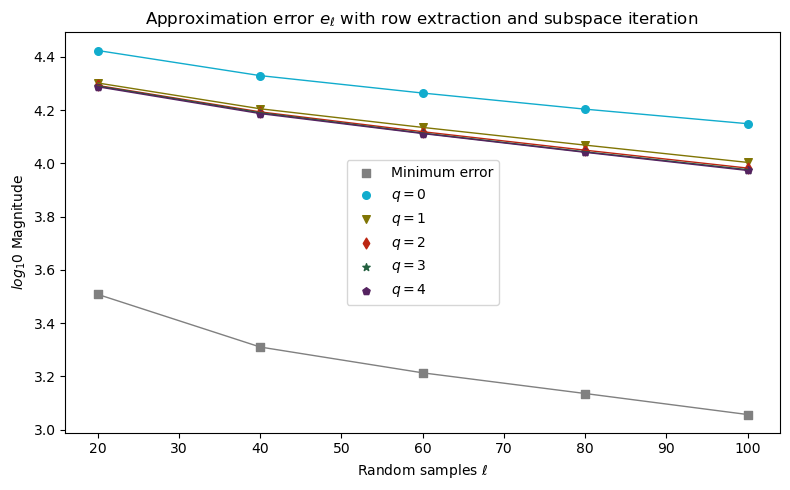

In [43]:
mins = list()
m,n = C.shape
q2list = {
    0: ([], '#11accd', 'o'),
    1: ([], '#807504', 'v'),
    2: ([], '#bc2612', 'd'),
    3: ([], '#236040', '*'), 
    4: ([],'#552360', 'p' )
    }

l = [20, 40, 60, 80, 100]
qs = [0, 1, 2, 3, 4]


#Computing the rsvd with power iteration on B
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
for k in l:
    #theorical error 
    a=Cs[k+1]
    mins.append(np.log10(a))
    #approximation for each q 
    for q in qs: 
        _,_,_, Q = rd.rsvd(C, k, q, e=0.1, return_range=True,subiter=True )
        err = np.linalg.norm((np.eye(m)- Q @ Q.T)@ C) #norm de frobinus 
        q2list[q][0].append(np.log10(err))
#plot for theorical minimum
ax.scatter(l, mins, color='gray', s=30, label='Minimum error', marker='s')
ax.plot(l, mins, color='gray', linewidth=1)
#plot for approximation 
for q in qs:
    data, color, marker = q2list[q]
    ax.scatter(l, data, s=30, label=r'$q = %s$' % q, marker=marker,
                   color=color)
    ax.plot(l, data, linewidth=1, color=color)

ax.set_ylabel('$log_10$ Magnitude')
ax.set_xlabel(r'Random samples $\ell$')
ax.set_title(r'Approximation error $e_{\ell}$ with row extraction and subspace iteration ')
plt.legend()
plt.tight_layout()
plt.show()

2. Test on simple matrix the adaptive randomized range finder 

In [97]:
s = rd.adaptive_finder(A, 0.01,20).shape[1]
s
rd.adaptive_finder(A, 0.1,20).shape[1]

14

In [98]:
m,n = A.shape
Q = rd.range_finder(A, s)
print("approximation error sould be bellow 0.1: ", np.linalg.norm((np.eye(m)-Q@Q.T)@A))
Q = rd.range_finder(A, 14)
print("approximation error sould be bellow 0.1: ", np.linalg.norm((np.eye(m)-Q@Q.T)@A))


approximation error sould be bellow 0.1:  0.000607142292503382
approximation error sould be bellow 0.1:  0.003636118203005498


We can see that the error $e_{\ell}$ is always greater that the theorical minimum of the erreur for each rank. 
The adaptive randomized rank finder suggest that a rank of 10 is enough for an error of 0.2.  
If we test with theorical value we see that we are close to the error of tolerance sets in the range finder algorithm. 

In [99]:
rd.adaptive_finder(B, 0.1).shape[1] #the dimension belong to 1:200
rd.adaptive_finder(B, 0.5).shape[1] #the dimension belong to 1:200


201

In [100]:
m,n = B.shape
Q = rd.range_finder(B, 200)
print("approximation error sould be bellow 0.1: ", np.linalg.norm((np.eye(m)-Q@Q.T)@B))

approximation error sould be bellow 0.1:  1.000874465983518e-13


In [88]:
Q = rd.range_finder(B, 199)
print("approximation error sould be bellow 0.1: ", np.linalg.norm((np.eye(m)-Q@Q.T)@B))

approximation error sould be bellow 0.1:  0.8965454016549294


For the matrix $B$ with slow decaying singular values, to get a tolerance $\epsilon =0.1 $. We need to compute the svd.  
In fact we can see at a rank $199$ the approximation error is $0.8965454016549294$

In [95]:
s = rd.adaptive_finder(C, 0.1,20).shape[1]
s

770

In [103]:
m,n = C.shape
Q = rd.range_finder(C, 769)
print("approximation error sould be bellow 0.1 with a rank 769: ", np.linalg.norm((np.eye(m)-Q@Q.T)@C))
Q = rd.range_finder(C, 767)
print("approximation with a rank smaller 767: ", np.linalg.norm((np.eye(m)-Q@Q.T)@C))

approximation error sould be bellow 0.1 with a rank 769:  9.741329685183728e-11
approximation with a rank smaller 767:  12.437119093689788
